In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.array(
    [
        [-1, 0, 1],
        [-0.5, 0.5, 1],
        [0, 1, -1],
        [0.5, 1, -1],
        [1, 0, 1],
        [1, -1, 1],
        [0, -1, -1],
        [0, 0, -1],
    ]
)
X = data[:, :2]
y = data[:, 2]

x_range = np.linspace(-1.2, 1.2, 400)
y_range = np.linspace(-1.2, 1.2, 400)
xx, yy = np.meshgrid(x_range, y_range)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([1 if x[0] < 0 else -1 for x in grid])
Z = Z.reshape(xx.shape)

### Part 1

Text(0.5, 1.0, 'Adaboost Round 1')

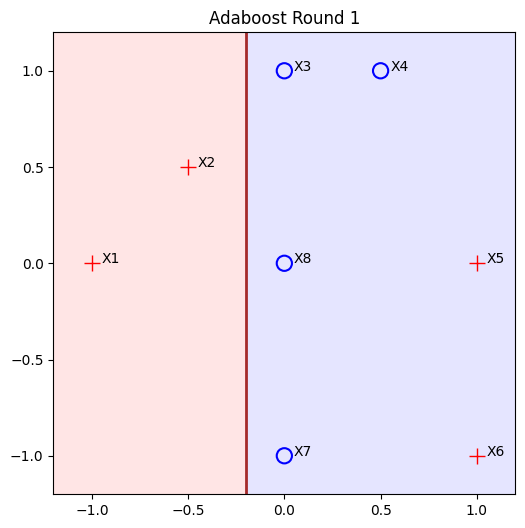

In [ ]:
# Adaboost round #1
plt.figure(figsize=(6, 6))

plt.axvspan(-1.2, -0.2, facecolor="red", alpha=0.1)
plt.axvspan(-0.2, 1.2, facecolor="blue", alpha=0.1)

for idx, (xi, yi) in enumerate(zip(X, y), 1):
    label = f"X{idx}"
    if yi == 1:
        plt.plot(xi[0], xi[1], "r+", markersize=12)
    else:
        plt.scatter(
            xi[0], xi[1], s=120, facecolors="none", edgecolors="blue", linewidths=1.5
        )
    plt.text(xi[0] + 0.05, xi[1], label, fontsize=10)

plt.axvline(x=-0.2, color="brown", linewidth=2)

plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

plt.gca().set_aspect("equal", adjustable="box")
plt.title("Adaboost Round 1")

Text(0.5, 1.0, 'Adaboost Round 2')

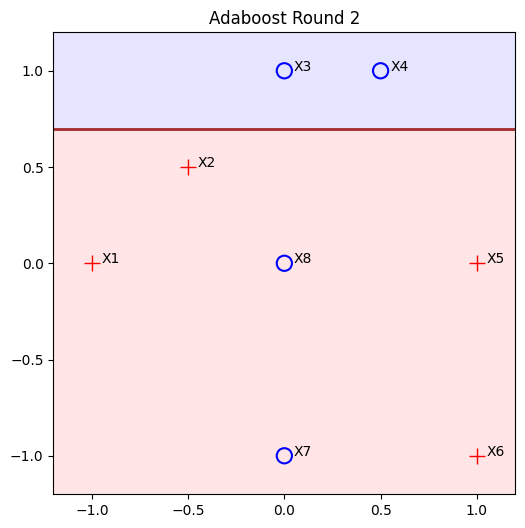

In [70]:
# Adaboost round #2
plt.figure(figsize=(6, 6))

plt.axhspan(-1.2, 0.7, facecolor="red", alpha=0.1)
plt.axhspan(0.7, 1.2, facecolor="blue", alpha=0.1)

for idx, (xi, yi) in enumerate(zip(X, y), 1):
    label = f"X{idx}"
    if yi == 1:
        plt.plot(xi[0], xi[1], "r+", markersize=12)
    else:
        plt.scatter(
            xi[0], xi[1], s=120, facecolors="none", edgecolors="blue", linewidths=1.5
        )
    plt.text(xi[0] + 0.05, xi[1], label, fontsize=10)

plt.axhline(y=0.7, color="brown", linewidth=2)

plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

plt.gca().set_aspect("equal", adjustable="box")
plt.title("Adaboost Round 2")

Text(0.5, 1.0, 'Adaboost Round 3')

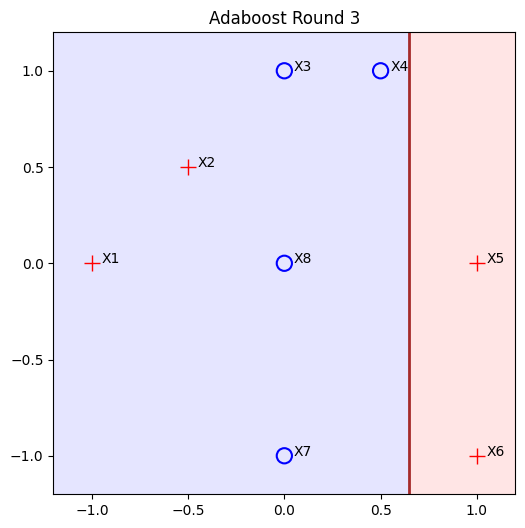

In [ ]:
# Adaboost round #3
plt.figure(figsize=(6, 6))

plt.axvspan(-1.2, 0.65, facecolor="blue", alpha=0.1)
plt.axvspan(0.65, 1.2, facecolor="red", alpha=0.1)

for idx, (xi, yi) in enumerate(zip(X, y), 1):
    label = f"X{idx}"
    if yi == 1:
        plt.plot(xi[0], xi[1], "r+", markersize=12)
    else:
        plt.scatter(
            xi[0], xi[1], s=120, facecolors="none", edgecolors="blue", linewidths=1.5
        )
    plt.text(xi[0] + 0.05, xi[1], label, fontsize=10)

plt.axvline(x=0.65, color="brown", linewidth=2)

plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

plt.gca().set_aspect("equal", adjustable="box")
plt.title("Adaboost Round 3")

### Part 2

In [81]:
def h1(x):
    return 1 if x[0] <= -0.2 else -1


def h2(x):
    return 1 if x[1] <= 0.7 else -1


def h3(x):
    return 1 if x[0] >= 0.65 else -1

In [82]:
alpha1, alpha2, alpha3 = 0.55, 0.81, 1.1

Z = np.array(
    [np.sign(alpha1 * h1(val) + alpha2 * h2(val) + alpha3 * h3(val)) for val in grid]
).reshape(xx.shape)

Text(0.5, 1.0, 'Final classifier')

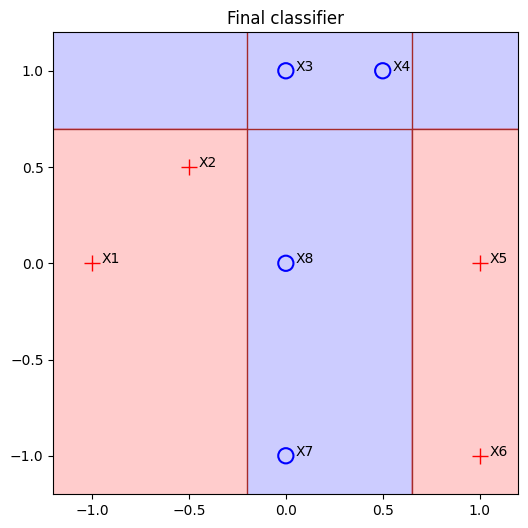

In [88]:
plt.figure(figsize=(6, 6))
plt.axvline(x=-0.2, color="brown", linewidth=1)
plt.axhline(y=0.7, color="brown", linewidth=1)
plt.axvline(x=0.65, color="brown", linewidth=1)

plt.contourf(xx, yy, Z, levels=1, colors=["blue", "red"], alpha=0.2)

for idx, (xi, yi) in enumerate(zip(X, y), 1):
    label = f"X{idx}"
    if yi == 1:
        plt.plot(xi[0], xi[1], "r+", markersize=12)
    else:
        plt.scatter(
            xi[0], xi[1], s=120, facecolors="none", edgecolors="blue", linewidths=1.5
        )
    plt.text(xi[0] + 0.05, xi[1], label, fontsize=10)

plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.title("Final classifier")